# BIA 6304
## Assignment 3
## Chris Gochis and Eric Long

# Read in data:

In [1]:
#import modules and setup environment
#code taken from week 5 examples

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
import math

#these options will allow for bigger chunks of text and rows to be displayed
#top code taken from week 4 examples
#bottom code taken from https://stackoverflow.com/questions/16424493/pandas-setting-no-of-max-rows

pd.set_option('display.max_colwidth', 15000)
pd.set_option('display.max_rows', 30000)

In [2]:
#read in data source and save into data frame
#data source taken from https://www.kaggle.com/datafiniti/hotel-reviews?select=Datafiniti_Hotel_Reviews_Jun19.csv
#code taken from week 4 examples

pathname = 'C:/Users/el033195/OneDrive - Cerner Corporation/PERSONAL/Data Science/BIA6304 - Text Mining/Week 4/'
hotel_df = pd.read_csv(pathname + "Datafiniti_Hotel_Reviews_Jun19-hw2_dataset.csv", index_col = False)

#test print lines
#print(hotel_df.shape)
#hotel_df.head(10)

In [3]:
#remove everything except review text and rating from data frame
#code taken from week 4 examples as well as https://www.w3resource.com/python-exercises/pandas/python-pandas-data-frame-exercise-5.php

hotel_df = hotel_df[['reviews.text','reviews.rating']]

#test print lines
#print(hotel_df.shape)
#hotel_df.head(10)

# Preprocessing:

In [4]:
#import nltk stopwords package
#code taken from week 3 examples

from nltk.corpus import stopwords

nltk_stopwords = stopwords.words("english")

In [5]:
#get initial counts for entire corpus
#code taken from week 5 examples

#define and apply the vectorizer

cv_raw = CountVectorizer(binary=False)
cv_transcript_raw = cv_raw.fit_transform(hotel_df['reviews.text'])
print(cv_transcript_raw.shape)

#get list of features + counts

names = cv_raw.get_feature_names()
count = np.sum(cv_transcript_raw.toarray(), axis = 0) 
count2 = count.tolist()

#create new data frame with features and counts

count_df = pd.DataFrame(count2, index = names, columns = ['count'])
sorted_count = count_df.sort_values(['count'], ascending = False)

#output top of new data frame

sorted_count.head(15)

(10000, 22112)


,count
the,67993
and,42699
to,36259
was,23046
we,22108
you,18577
in,17617
for,17169
of,14938
is,14395


In [6]:
#the ordered feature list shows mostly stopwords at the top
#remove default stopwords
#code taken from week 5 examples

#define and apply the vectorizer

cv = CountVectorizer(binary=False, stop_words = nltk_stopwords)
cv_transcript = cv.fit_transform(hotel_df['reviews.text'])
print(cv_transcript.shape)

#get list of features + counts

names = cv.get_feature_names()
count = np.sum(cv_transcript.toarray(), axis = 0) 
count2 = count.tolist()

#create new data frame with features and counts

count_df = pd.DataFrame(count2, index = names, columns = ['count'])
sorted_count = count_df.sort_values(['count'], ascending = False)

#output list of feature counts w/o stop words

sorted_count.head(15)

(10000, 21971)


,count
hotel,12370
room,10282
stay,7890
staff,6250
great,5909
us,5638
clean,4222
breakfast,4174
thank,3961
nice,3919


In [7]:
#output feature names
#code taken from week 5 examples

#cv.get_feature_names()

In [8]:
#remove additional stop words (including some "garbage" words from the feature list)
#code taken from week 4 and 5 examples

my_stopwords = nltk_stopwords + ["us","would","get","one","also","see","007traveler64","0thank","100evi","104lawandar","1175dortegahotelnikkosf","1203shirley","131gabrielu","151mistyai","170rigobertoh","186deannag","1jozi","219norbertob","232indraneels","236susiec","244mmoreno","245clarencek","259cheryle","267alenkar","283pamelag","3057mlynchsohogrand","318glennj","327sylvia","346laurieb","35johannaj","373jkim","3777seth","391tiffanya","396joana","4000jdragnanolahotelgroup","4023lmaurerjdvhotels","4031charles","4057andre","4057anthony","4057william","406eltong","441rhondam","444diane","501sandy","53wohoo","544be","554lklu","554sharone","5557sandlhamptonhilton","557debral","5700sincerely","575bjacobs","57crystalcthank","613rachellel","630alannaw","6tribes","702kathryno","721jeffreygu","746sunilp","746tabithal","763christinap","773ericac","805ronaldw","80wingslogo84","814isaiahc","837eugene","850bond007","874reginab","882triciam","883anelr","886raquelj","910keithg","934sheilae","95pattin","970geraldi","976emma","97claudinea"]

#define and apply the vectorizer

cv = CountVectorizer(binary=False, stop_words = my_stopwords)
cv_transcript = cv.fit_transform(hotel_df['reviews.text'])
print(cv_transcript.shape)

#get list of features + counts

names = cv.get_feature_names()
count = np.sum(cv_transcript.toarray(), axis = 0) 
count2 = count.tolist()

#create new data frame with features and counts

count_df = pd.DataFrame(count2, index = names, columns = ['count'])
sorted_count = count_df.sort_values(['count'], ascending = False)

#output list of feature counts w/o stop words

sorted_count.head(15)

(10000, 21894)


,count
hotel,12370
room,10282
stay,7890
staff,6250
great,5909
clean,4222
breakfast,4174
thank,3961
nice,3919
time,3837


In [9]:
#create new column for data frame
#code taken from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html

hotel_df.insert(1,'reviews.text.processed',hotel_df.loc[:,'reviews.text'])

#test print lines
#print(hotel_df.shape)
#hotel_df.head(10)

In [10]:
#make all text lowercase and remove stop words from new column
#add processed data to original data frame

#lowercase
#code taken from https://datatofish.com/lowercase-pandas-dataframe/

hotel_df['reviews.text.processed'] = hotel_df.loc[:,'reviews.text.processed'].str.lower()

#stopwords
#code taken from week 3 examples and https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

hotel_df['reviews.text.processed'] = hotel_df['reviews.text.processed'].apply(lambda x: [y for y in x.split() if y not in my_stopwords])
hotel_df['reviews.text.processed'] = [" ".join(y) for y in hotel_df['reviews.text.processed']]

#test print lines
#print(hotel_df.shape)
#hotel_df.head(10)

# Prediction:

<AxesSubplot:>

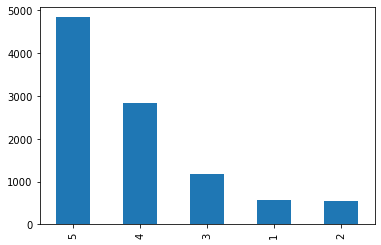

In [11]:
#additional environment set up
#code taken from week 5 examples

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#plot distribution of data
#code taken from week 5 examples

hotel_df['reviews.rating'].value_counts().plot(kind='bar')

In [12]:
#set X and Y variables for train/test sets
#code taken from week 5 examples

#additional environment setup

from sklearn.model_selection import train_test_split

#declare variables
#X = features
#Y = labels

X = cv_transcript.toarray()
#print(type(X), X[0:10])

Y = hotel_df['reviews.rating'].values
#print(type(Y), Y[0:10])

In [13]:
#split data into training and test sets - 70/30 split
#code taken from week 5 examples

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#output set sizes, confirm correct size

print(X_train.shape) #number of columns should match X_test (2 in this case)
print(X_test.shape)
print(Y_train.shape) #number of columns should match Y_test and should only be 1
print(Y_test.shape)

(7000, 21894)
(3000, 21894)
(7000,)
(3000,)


In [14]:
#use decision tree for prediction
#code taken from week 5 examples

#additional environment setup

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

#fit a Decision Tree model to the data

model = DecisionTreeClassifier(random_state = 42)
print(model)
model.fit(X_train, Y_train)

#make predictions

dt0_expected = Y_test
dt0_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(dt0_expected, dt0_predicted))) #metrics.accuracy_score is part of DecisionTreeClassifier
print(metrics.classification_report(dt0_expected, dt0_predicted))

DecisionTreeClassifier(random_state=42)
0.4856666666666667
accuracy: 0.4856666666666667
              precision    recall  f1-score   support

           1       0.37      0.27      0.31       169
           2       0.26      0.19      0.22       169
           3       0.24      0.23      0.24       343
           4       0.38      0.37      0.37       870
           5       0.62      0.67      0.65      1449

    accuracy                           0.49      3000
   macro avg       0.37      0.35      0.36      3000
weighted avg       0.47      0.49      0.48      3000



In [15]:
#check depth of initial model
#code taken from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

model.get_depth()

124

In [16]:
#tweak 1 (change max_depth = 100)
#reference for tweaks: https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

#fit a Decision Tree model to the data

model = DecisionTreeClassifier(random_state = 42, max_depth = 100)
print(model)
model.fit(X_train, Y_train)

#make predictions

dt1_expected = Y_test
dt1_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(dt1_expected, dt1_predicted))) #metrics.accuracy_score is part of DecisionTreeClassifier
print(metrics.classification_report(dt1_expected, dt1_predicted))

DecisionTreeClassifier(max_depth=100, random_state=42)
0.48933333333333334
accuracy: 0.48933333333333334
              precision    recall  f1-score   support

           1       0.36      0.28      0.32       169
           2       0.26      0.19      0.22       169
           3       0.25      0.23      0.24       343
           4       0.38      0.38      0.38       870
           5       0.63      0.68      0.65      1449

    accuracy                           0.49      3000
   macro avg       0.38      0.35      0.36      3000
weighted avg       0.48      0.49      0.48      3000



In [17]:
#tweak 2 (add min_samples_split = 5)

#fit a Decision Tree model to the data

model = DecisionTreeClassifier(random_state = 42, max_depth = 100, min_samples_split = 5)
print(model)
model.fit(X_train, Y_train)

#make predictions

dt2_expected = Y_test
dt2_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(dt2_expected, dt2_predicted))) #metrics.accuracy_score is part of DecisionTreeClassifier
print(metrics.classification_report(dt2_expected, dt2_predicted))

DecisionTreeClassifier(max_depth=100, min_samples_split=5, random_state=42)
0.492
accuracy: 0.492
              precision    recall  f1-score   support

           1       0.32      0.27      0.29       169
           2       0.25      0.17      0.20       169
           3       0.25      0.25      0.25       343
           4       0.39      0.37      0.38       870
           5       0.63      0.69      0.66      1449

    accuracy                           0.49      3000
   macro avg       0.37      0.35      0.36      3000
weighted avg       0.48      0.49      0.48      3000



In [18]:
#tweak 3 (increase max_depth = 115)

#fit a Decision Tree model to the data

model = DecisionTreeClassifier(random_state = 42, max_depth = 115)
print(model)
model.fit(X_train, Y_train)

#make predictions

dt3_expected = Y_test
dt3_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(dt3_expected, dt3_predicted))) #metrics.accuracy_score is part of DecisionTreeClassifier
print(metrics.classification_report(dt3_expected, dt3_predicted))

DecisionTreeClassifier(max_depth=115, random_state=42)
0.492
accuracy: 0.492
              precision    recall  f1-score   support

           1       0.38      0.27      0.31       169
           2       0.31      0.21      0.25       169
           3       0.26      0.26      0.26       343
           4       0.39      0.39      0.39       870
           5       0.62      0.67      0.65      1449

    accuracy                           0.49      3000
   macro avg       0.39      0.36      0.37      3000
weighted avg       0.48      0.49      0.49      3000



In [19]:
#tweak 4 (add min_samples_split = 5)

#fit a Decision Tree model to the data

model = DecisionTreeClassifier(random_state = 42, max_depth = 115, min_samples_split = 5)
print(model)
model.fit(X_train, Y_train)

#make predictions

dt4_expected = Y_test
dt4_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(dt4_expected, dt4_predicted))) #metrics.accuracy_score is part of DecisionTreeClassifier
print(metrics.classification_report(dt4_expected, dt4_predicted))

DecisionTreeClassifier(max_depth=115, min_samples_split=5, random_state=42)
0.49366666666666664
accuracy: 0.49366666666666664
              precision    recall  f1-score   support

           1       0.33      0.29      0.31       169
           2       0.27      0.18      0.21       169
           3       0.25      0.23      0.24       343
           4       0.39      0.38      0.38       870
           5       0.63      0.69      0.66      1449

    accuracy                           0.49      3000
   macro avg       0.37      0.35      0.36      3000
weighted avg       0.48      0.49      0.49      3000



In [20]:
#use naive bayes for prediction
#code taken from week 5 examples

#additional environment setup

from sklearn.naive_bayes import MultinomialNB

#fit a Naive Bayes model to the data

model = MultinomialNB()
print(model)
model.fit(X_train, Y_train)

#make predictions

nb0_expected = Y_test
nb0_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(nb0_expected, nb0_predicted)))
print(metrics.classification_report(nb0_expected, nb0_predicted))

MultinomialNB()
0.6286666666666667
accuracy: 0.6286666666666667
              precision    recall  f1-score   support

           1       0.70      0.40      0.51       169
           2       0.36      0.05      0.08       169
           3       0.35      0.35      0.35       343
           4       0.52      0.53      0.52       870
           5       0.74      0.85      0.79      1449

    accuracy                           0.63      3000
   macro avg       0.54      0.44      0.45      3000
weighted avg       0.61      0.63      0.61      3000



In [21]:
#use logistic regression for prediction
#code taken from week 5 examples

#additional environment setup

from sklearn.linear_model import LogisticRegression

#fit a logistic regression model to the data
#NOTE: default max_iter=100 failed

model = LogisticRegression(random_state = 42, solver = 'lbfgs', multi_class = 'auto', max_iter = 500)
print(model)
model.fit(X_train, Y_train)

#make predictions

lr0_expected = Y_test
lr0_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(lr0_expected, lr0_predicted)))
print(metrics.classification_report(lr0_expected, lr0_predicted))

LogisticRegression(max_iter=500, random_state=42)
0.6073333333333333
accuracy: 0.6073333333333333
              precision    recall  f1-score   support

           1       0.58      0.47      0.52       169
           2       0.33      0.20      0.25       169
           3       0.41      0.36      0.39       343
           4       0.50      0.50      0.50       870
           5       0.72      0.80      0.76      1449

    accuracy                           0.61      3000
   macro avg       0.51      0.46      0.48      3000
weighted avg       0.59      0.61      0.60      3000



In [22]:
#tweak 1 (add class_weight = 'balanced')

#fit a logistic regression model to the data

model = LogisticRegression(random_state = 42, solver = 'lbfgs', multi_class = 'auto', max_iter = 500, class_weight = 'balanced')
print(model)
model.fit(X_train, Y_train)

#make predictions

lr1_expected = Y_test
lr1_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(lr1_expected, lr1_predicted)))
print(metrics.classification_report(lr1_expected, lr1_predicted))

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)
0.5906666666666667
accuracy: 0.5906666666666667
              precision    recall  f1-score   support

           1       0.52      0.53      0.53       169
           2       0.33      0.27      0.30       169
           3       0.37      0.40      0.38       343
           4       0.49      0.50      0.50       870
           5       0.75      0.73      0.74      1449

    accuracy                           0.59      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.59      0.59      0.59      3000



In [23]:
#tweak 2 (remove class_weight and increase max_iter = 1000)
#NOTE: also tried max_iter = 400 in this iteration, no difference in accuracy for either

#fit a logistic regression model to the data

model = LogisticRegression(random_state = 42, solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
print(model)
model.fit(X_train, Y_train)

#make predictions

lr2_expected = Y_test
lr2_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(lr2_expected, lr2_predicted)))
print(metrics.classification_report(lr2_expected, lr2_predicted))

LogisticRegression(max_iter=1000, random_state=42)
0.6073333333333333
accuracy: 0.6073333333333333
              precision    recall  f1-score   support

           1       0.58      0.47      0.52       169
           2       0.33      0.20      0.25       169
           3       0.41      0.36      0.39       343
           4       0.50      0.50      0.50       870
           5       0.72      0.80      0.76      1449

    accuracy                           0.61      3000
   macro avg       0.51      0.46      0.48      3000
weighted avg       0.59      0.61      0.60      3000



# Next iteration: add ngrams and min/max df

In [24]:
#add additional options to count vectorizer
#code taken from week 5 examples

#define and apply the vectorizer

cv2 = CountVectorizer(binary=False, stop_words = my_stopwords, max_df = 0.99, min_df = 0.01, ngram_range = (1,2))
cv2_transcript = cv2.fit_transform(hotel_df['reviews.text'])
print(cv2_transcript.shape)

#get list of features + counts

names = cv2.get_feature_names()
count = np.sum(cv2_transcript.toarray(), axis = 0) 
count2 = count.tolist()

#create new data frame with features and counts

count_df = pd.DataFrame(count2, index = names, columns = ['count'])
sorted_count = count_df.sort_values(['count'], ascending = False)

#output list of feature counts w/o stop words

sorted_count.head(15)

#NOTE: this was attempted w/ max_df = 0.95 and min_df = 0.05
#the resulting feature list was only 197 so these values were changed to current

(10000, 1125)


,count
hotel,12370
room,10282
stay,7890
staff,6250
great,5909
clean,4222
breakfast,4174
thank,3961
nice,3919
time,3837


In [25]:
#output feature names
#code taken from week 5 examples

#cv2.get_feature_names()

#NOTE: this feature list looks much better

# Next iteration of prediction:

In [26]:
#set X and Y variables for train/test sets
#code taken from week 5 examples

#declare variables
#X = features
#Y = labels

X2 = cv2_transcript.toarray()
#print(type(X2), X2[0:10])

Y2 = hotel_df['reviews.rating'].values
#print(type(Y2), Y2[0:10])

In [27]:
#split data into training and test sets - 70/30 split
#code taken from week 5 examples

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)

#output set sizes, confirm correct size

print(X2_train.shape) #number of columns should match X_test (2 in this case)
print(X2_test.shape)
print(Y2_train.shape) #number of columns should match Y_test and should only be 1
print(Y2_test.shape)

(7000, 1125)
(3000, 1125)
(7000,)
(3000,)


In [28]:
#use decision tree for prediction
#code taken from week 5 examples

#fit a Decision Tree model to the data

model = DecisionTreeClassifier(random_state = 42)
print(model)
model.fit(X2_train, Y2_train)

#make predictions

dt0_expected2 = Y2_test
dt0_predicted2 = model.predict(X2_test)

print(model.score(X2_test, Y2_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(dt0_expected2, dt0_predicted2))) #metrics.accuracy_score is part of DecisionTreeClassifier
print(metrics.classification_report(dt0_expected2, dt0_predicted2))

DecisionTreeClassifier(random_state=42)
0.47733333333333333
accuracy: 0.47733333333333333
              precision    recall  f1-score   support

           1       0.32      0.29      0.30       169
           2       0.20      0.18      0.19       169
           3       0.24      0.22      0.23       343
           4       0.38      0.40      0.39       870
           5       0.63      0.64      0.64      1449

    accuracy                           0.48      3000
   macro avg       0.36      0.35      0.35      3000
weighted avg       0.47      0.48      0.48      3000



In [29]:
#check depth of initial model
#code taken from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

model.get_depth()

87

In [30]:
#tweak 1 (change max_depth = 75)
#NOTE: also tried min_samples_split = 5, accuracy was worse
#code taken from week 5 examples

#fit a Decision Tree model to the data

model = DecisionTreeClassifier(random_state = 42, max_depth = 75)
print(model)
model.fit(X2_train, Y2_train)

#make predictions

dt1_expected2 = Y2_test
dt1_predicted2 = model.predict(X2_test)

print(model.score(X2_test, Y2_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(dt1_expected2, dt1_predicted2))) #metrics.accuracy_score is part of DecisionTreeClassifier
print(metrics.classification_report(dt1_expected2, dt1_predicted2))

DecisionTreeClassifier(max_depth=75, random_state=42)
0.479
accuracy: 0.479
              precision    recall  f1-score   support

           1       0.34      0.28      0.31       169
           2       0.25      0.20      0.22       169
           3       0.25      0.24      0.25       343
           4       0.37      0.39      0.38       870
           5       0.63      0.65      0.64      1449

    accuracy                           0.48      3000
   macro avg       0.37      0.35      0.36      3000
weighted avg       0.47      0.48      0.48      3000



In [31]:
#use naive bayes for prediction
#code taken from week 5 examples

#fit a Naive Bayes model to the data

model = MultinomialNB()
print(model)
model.fit(X2_train, Y2_train)

#make predictions

nb0_expected2 = Y2_test
nb0_predicted2 = model.predict(X2_test)

print(model.score(X2_test, Y2_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(nb0_expected2, nb0_predicted2)))
print(metrics.classification_report(nb0_expected2, nb0_predicted2))

MultinomialNB()
0.603
accuracy: 0.603
              precision    recall  f1-score   support

           1       0.45      0.64      0.53       169
           2       0.31      0.27      0.29       169
           3       0.38      0.39      0.38       343
           4       0.52      0.51      0.52       870
           5       0.77      0.74      0.76      1449

    accuracy                           0.60      3000
   macro avg       0.48      0.51      0.49      3000
weighted avg       0.61      0.60      0.60      3000



In [32]:
#use logistic regression for prediction
#code taken from week 5 examples

#fit a logistic regression model to the data
#NOTE: default max_iter=100 failed
#NOTE: also tried increasing max_iter = 1000, no change in accuracy
#adding the class_weight parameter resulted in lower accuarcy

model = LogisticRegression(random_state = 42, solver = 'lbfgs', multi_class = 'auto', max_iter = 500)
print(model)
model.fit(X2_train, Y2_train)

#make predictions

lr0_expected2 = Y2_test
lr0_predicted2 = model.predict(X2_test)

print(model.score(X2_test, Y2_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(lr0_expected2, lr0_predicted2)))
print(metrics.classification_report(lr0_expected2, lr0_predicted2))

LogisticRegression(max_iter=500, random_state=42)
0.5933333333333334
accuracy: 0.5933333333333334
              precision    recall  f1-score   support

           1       0.50      0.50      0.50       169
           2       0.31      0.22      0.26       169
           3       0.36      0.36      0.36       343
           4       0.50      0.46      0.48       870
           5       0.72      0.79      0.75      1449

    accuracy                           0.59      3000
   macro avg       0.48      0.46      0.47      3000
weighted avg       0.58      0.59      0.59      3000



# Next iteration: use a weighted vectorizer

In [33]:
#use a weighted vectorizer - with ngrams
#code taken from week 5 examples

#define and apply the vectorizer

tfidf = TfidfVectorizer(stop_words = my_stopwords, max_df = 0.99, min_df = 0.01, ngram_range = (1,2))
tfidf_transcript = tfidf.fit_transform(hotel_df['reviews.text'])
print(tfidf_transcript.shape)

#get list of features + counts

names = tfidf.get_feature_names()
count = np.sum(tfidf_transcript.toarray(), axis = 0) 
count2 = count.tolist()

#create new data frame with features and counts

count_df = pd.DataFrame(count2, index = names, columns = ['count'])
sorted_count = count_df.sort_values(['count'], ascending = False)

#output list of feature counts w/o stop words

sorted_count.head(15)

(10000, 1125)


,count
hotel,615.079728
room,541.852456
stay,447.142862
great,417.990009
staff,397.099023
clean,331.271917
nice,320.898912
breakfast,314.016380
rooms,297.819189
good,294.820548


In [34]:
#use a weighted vectorizer - without ngrams
#code taken from week 5 examples

#define and apply the vectorizer

tfidf2 = TfidfVectorizer(stop_words = my_stopwords, max_df = 0.99, min_df = 0.01)
tfidf2_transcript = tfidf2.fit_transform(hotel_df['reviews.text'])
print(tfidf2_transcript.shape)

#get list of features + counts

names = tfidf2.get_feature_names()
count = np.sum(tfidf2_transcript.toarray(), axis = 0) 
count2 = count.tolist()

#create new data frame with features and counts

count_df = pd.DataFrame(count2, index = names, columns = ['count'])
sorted_count = count_df.sort_values(['count'], ascending = False)

#output list of feature counts w/o stop words

sorted_count.head(15)

(10000, 910)


,count
hotel,668.709534
room,580.809638
stay,490.285864
great,461.888548
staff,436.186337
clean,365.875973
nice,351.208942
breakfast,344.646076
rooms,322.547844
good,321.081999


# Next iteration of prediction:

In [35]:
#set X and Y variables for train/test sets
#code taken from week 5 examples

#declare variables
#X = features
#Y = labels

#with ngrams

X3 = tfidf_transcript.toarray()
#print(type(X3), X3[0:10])

Y3 = hotel_df['reviews.rating'].values
#print(type(Y3), Y3[0:10])

#without ngrams

X4 = tfidf2_transcript.toarray()
#print(type(X3), X3[0:10])

Y4 = hotel_df['reviews.rating'].values
#print(type(Y3), Y3[0:10])

In [36]:
#split data into training and test sets - 70/30 split
#code taken from week 5 examples

#with ngrams

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=42)

#output set sizes, confirm correct size

print(X3_train.shape) #number of columns should match X_test (2 in this case)
print(X3_test.shape)
print(Y3_train.shape) #number of columns should match Y_test and should only be 1
print(Y3_test.shape)

#without ngrams

X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.3, random_state=42)

#output set sizes, confirm correct size

print(X4_train.shape) #number of columns should match X_test (2 in this case)
print(X4_test.shape)
print(Y4_train.shape) #number of columns should match Y_test and should only be 1
print(Y4_test.shape)

(7000, 1125)
(3000, 1125)
(7000,)
(3000,)
(7000, 910)
(3000, 910)
(7000,)
(3000,)


In [37]:
#use decision tree for prediction
#code taken from week 5 examples

#with ngrams

#fit a Decision Tree model to the data

model = DecisionTreeClassifier(random_state = 42)
print(model)
model.fit(X3_train, Y3_train)

#make predictions

dt0_expected3 = Y3_test
dt0_predicted3 = model.predict(X3_test)

print(model.score(X3_test, Y3_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(dt0_expected3, dt0_predicted3))) #metrics.accuracy_score is part of DecisionTreeClassifier
print(metrics.classification_report(dt0_expected3, dt0_predicted3))

DecisionTreeClassifier(random_state=42)
0.467
accuracy: 0.467
              precision    recall  f1-score   support

           1       0.29      0.28      0.28       169
           2       0.21      0.13      0.16       169
           3       0.23      0.25      0.24       343
           4       0.37      0.39      0.38       870
           5       0.62      0.63      0.62      1449

    accuracy                           0.47      3000
   macro avg       0.35      0.33      0.34      3000
weighted avg       0.46      0.47      0.46      3000



In [38]:
#use decision tree for prediction
#code taken from week 5 examples

#without ngrams

#fit a Decision Tree model to the data

model = DecisionTreeClassifier(random_state = 42)
print(model)
model.fit(X4_train, Y4_train)

#make predictions

dt0_expected4 = Y4_test
dt0_predicted4 = model.predict(X4_test)

print(model.score(X4_test, Y4_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(dt0_expected4, dt0_predicted4))) #metrics.accuracy_score is part of DecisionTreeClassifier
print(metrics.classification_report(dt0_expected4, dt0_predicted4))

DecisionTreeClassifier(random_state=42)
0.4676666666666667
accuracy: 0.4676666666666667
              precision    recall  f1-score   support

           1       0.31      0.28      0.29       169
           2       0.22      0.18      0.19       169
           3       0.21      0.21      0.21       343
           4       0.37      0.39      0.38       870
           5       0.63      0.63      0.63      1449

    accuracy                           0.47      3000
   macro avg       0.35      0.34      0.34      3000
weighted avg       0.46      0.47      0.47      3000



In [39]:
#the above models don't look much better than before - not going to proceed with additional tweaking

In [40]:
#use naive bayes for prediction
#code taken from week 5 examples

#with ngrams

#fit a Naive Bayes model to the data

model = MultinomialNB()
print(model)
model.fit(X3_train, Y3_train)

#make predictions

nb0_expected3 = Y3_test
nb0_predicted3 = model.predict(X3_test)

print(model.score(X3_test, Y3_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(nb0_expected3, nb0_predicted3)))
print(metrics.classification_report(nb0_expected3, nb0_predicted3))

MultinomialNB()
0.5936666666666667
accuracy: 0.5936666666666667
              precision    recall  f1-score   support

           1       0.62      0.41      0.49       169
           2       0.47      0.05      0.10       169
           3       0.36      0.20      0.26       343
           4       0.49      0.34      0.40       870
           5       0.65      0.93      0.76      1449

    accuracy                           0.59      3000
   macro avg       0.52      0.39      0.40      3000
weighted avg       0.56      0.59      0.55      3000



In [41]:
#use naive bayes for prediction
#code taken from week 5 examples

#without ngrams

#fit a Naive Bayes model to the data

model = MultinomialNB()
print(model)
model.fit(X4_train, Y4_train)

#make predictions

nb0_expected4 = Y4_test
nb0_predicted4 = model.predict(X4_test)

print(model.score(X4_test, Y4_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(nb0_expected4, nb0_predicted4)))
print(metrics.classification_report(nb0_expected4, nb0_predicted4))

MultinomialNB()
0.587
accuracy: 0.587
              precision    recall  f1-score   support

           1       0.66      0.39      0.49       169
           2       0.50      0.05      0.09       169
           3       0.36      0.18      0.24       343
           4       0.47      0.31      0.37       870
           5       0.64      0.93      0.76      1449

    accuracy                           0.59      3000
   macro avg       0.52      0.37      0.39      3000
weighted avg       0.55      0.59      0.53      3000



In [42]:
#use logistic regression for prediction
#code taken from week 5 examples

#fit a logistic regression model to the data
#NOTE: default max_iter=100 failed
#NOTE: also tried increasing max_iter = 1000, no change in accuracy
#adding the class_weight parameter resulted in lower accuarcy

#with ngrams

model = LogisticRegression(random_state = 42, solver = 'lbfgs', multi_class = 'auto', max_iter = 500)
print(model)
model.fit(X3_train, Y3_train)

#make predictions

lr0_expected3 = Y3_test
lr0_predicted3 = model.predict(X3_test)

print(model.score(X3_test, Y3_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(lr0_expected3, lr0_predicted3)))
print(metrics.classification_report(lr0_expected3, lr0_predicted3))

LogisticRegression(max_iter=500, random_state=42)
0.6253333333333333
accuracy: 0.6253333333333333
              precision    recall  f1-score   support

           1       0.67      0.49      0.56       169
           2       0.47      0.14      0.22       169
           3       0.42      0.32      0.36       343
           4       0.53      0.48      0.50       870
           5       0.70      0.86      0.77      1449

    accuracy                           0.63      3000
   macro avg       0.56      0.46      0.48      3000
weighted avg       0.60      0.63      0.60      3000



In [43]:
#use logistic regression for prediction
#code taken from week 5 examples

#fit a logistic regression model to the data
#NOTE: default max_iter=100 failed
#NOTE: also tried increasing max_iter = 1000, no change in accuracy
#adding the class_weight parameter resulted in lower accuarcy

#without ngrams

model = LogisticRegression(random_state = 42, solver = 'lbfgs', multi_class = 'auto', max_iter = 500)
print(model)
model.fit(X4_train, Y4_train)

#make predictions

lr0_expected4 = Y4_test
lr0_predicted4 = model.predict(X4_test)

print(model.score(X4_test, Y4_test))

#summarize the fit of the model

print("accuracy: " + str(metrics.accuracy_score(lr0_expected4, lr0_predicted4)))
print(metrics.classification_report(lr0_expected4, lr0_predicted4))

LogisticRegression(max_iter=500, random_state=42)
0.631
accuracy: 0.631
              precision    recall  f1-score   support

           1       0.65      0.51      0.57       169
           2       0.45      0.16      0.24       169
           3       0.43      0.32      0.37       343
           4       0.53      0.49      0.51       870
           5       0.71      0.86      0.78      1449

    accuracy                           0.63      3000
   macro avg       0.55      0.47      0.49      3000
weighted avg       0.61      0.63      0.61      3000



# Next iteration: count vectorizer with ngrams, no weights

In [44]:
#add only ngrams to vectorizer
#code taken from week 5 examples

#define and apply the vectorizer

cv3 = CountVectorizer(binary=False, stop_words = nltk_stopwords, ngram_range = (1,2))
cv3_transcript = cv3.fit_transform(hotel_df['reviews.text'])
print(cv3_transcript.shape)

#get list of features + counts

###
#commenting out the below lines to clean-up output
###

##names = cv3.get_feature_names()
##count = np.sum(cv3_transcript.toarray(), axis = 0) 
##count2 = count.tolist()

#create new data frame with features and counts

##count_df = pd.DataFrame(count2, index = names, columns = ['count'])
##sorted_count = count_df.sort_values(['count'], ascending = False)

#output list of feature counts w/o stop words

##sorted_count.head(15)

#this results in a massive feature set - cannot proceed due to memory constraints.

(10000, 313081)


# Results:

In [45]:
#Define confusion matrix procedure
#code taken from week 5 examples

def create_cm(t1, t2):
    cm = metrics.confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

Decision Tree Predictions:


Count Vectorizer, No Tweaks - No min/max df, no ngrams


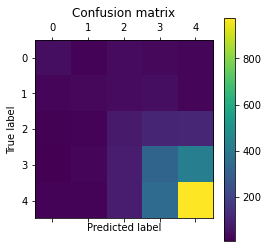

[[ 45  22  41  33  28]
 [ 28  32  39  46  24]
 [ 18  22  80 110 113]
 [ 11  26  87 323 423]
 [ 20  19  84 349 977]]


              precision    recall  f1-score   support

           1    0.36885   0.26627   0.30928       169
           2    0.26446   0.18935   0.22069       169
           3    0.24169   0.23324   0.23739       343
           4    0.37515   0.37126   0.37319       870
           5    0.62428   0.67426   0.64831      1449

    accuracy                        0.48567      3000
   macro avg    0.37489   0.34688   0.35777      3000
weighted avg    0.47363   0.48567   0.47836      3000



Count Vectorizer, Tweak 1 - No min/max df, no ngrams


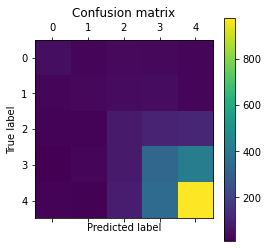

[[ 47  24  37  34  27]
 [ 30  32  39  44  24]
 [ 20  20  80 108 115]
 [ 12  28  81 330 419]
 [ 20  17  84 349 979]]


              precision    recall  f1-score   support

           1    0.36434   0.27811   0.31544       169
           2    0.26446   0.18935   0.22069       169
           3    0.24922   0.23324   0.24096       343
           4    0.38150   0.37931   0.38040       870
           5    0.62596   0.67564   0.64985      1449

    accuracy                        0.48933      3000
   macro avg    0.37710   0.35113   0.36147      3000
weighted avg    0.47689   0.48933   0.48195      3000



Count Vectorizer, Tweak 2 - No min/max df, no ngrams


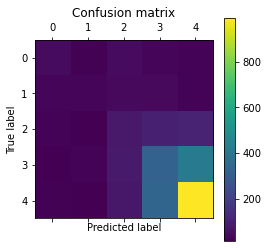

[[ 46  22  44  29  28]
 [ 32  29  40  42  26]
 [ 26  19  85 103 110]
 [ 18  27  88 323 414]
 [ 23  17  81 335 993]]


              precision    recall  f1-score   support

           1    0.31724   0.27219   0.29299       169
           2    0.25439   0.17160   0.20495       169
           3    0.25148   0.24781   0.24963       343
           4    0.38822   0.37126   0.37955       870
           5    0.63208   0.68530   0.65762      1449

    accuracy                        0.49200      3000
   macro avg    0.36868   0.34963   0.35695      3000
weighted avg    0.47883   0.49200   0.48429      3000



Count Vectorizer, Tweak 3 - No min/max df, no ngrams


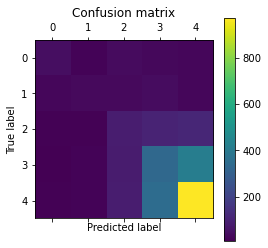

[[ 45  22  41  33  28]
 [ 28  36  36  42  27]
 [ 17  17  88 106 115]
 [ 11  22  85 335 417]
 [ 18  21  88 350 972]]


              precision    recall  f1-score   support

           1    0.37815   0.26627   0.31250       169
           2    0.30508   0.21302   0.25087       169
           3    0.26036   0.25656   0.25844       343
           4    0.38684   0.38506   0.38594       870
           5    0.62348   0.67081   0.64628      1449

    accuracy                        0.49200      3000
   macro avg    0.39078   0.35834   0.37081      3000
weighted avg    0.48158   0.49200   0.48536      3000



Count Vectorizer, Tweak 4 - No min/max df, no ngrams


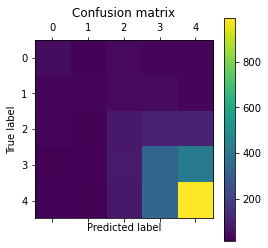

[[ 49  23  41  29  27]
 [ 31  30  39  42  27]
 [ 28  19  80 105 111]
 [ 16  25  85 329 415]
 [ 25  15  79 337 993]]


              precision    recall  f1-score   support

           1    0.32886   0.28994   0.30818       169
           2    0.26786   0.17751   0.21352       169
           3    0.24691   0.23324   0.23988       343
           4    0.39074   0.37816   0.38435       870
           5    0.63128   0.68530   0.65718      1449

    accuracy                        0.49367      3000
   macro avg    0.37313   0.35283   0.36062      3000
weighted avg    0.48007   0.49367   0.48569      3000



In [46]:
#print confusion matricies for decision tree predictions
#code taken from week 5 examples and https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("Decision Tree Predictions:")
print("\n")
print("Count Vectorizer, No Tweaks - No min/max df, no ngrams")
create_cm(dt0_expected, dt0_predicted)
print("\n")
print(metrics.classification_report(dt0_expected, dt0_predicted, digits=5))
print("\n")
print("Count Vectorizer, Tweak 1 - No min/max df, no ngrams")
create_cm(dt1_expected, dt1_predicted)
print("\n")
print(metrics.classification_report(dt1_expected, dt1_predicted, digits=5))
print("\n")
print("Count Vectorizer, Tweak 2 - No min/max df, no ngrams")
create_cm(dt2_expected, dt2_predicted)
print("\n")
print(metrics.classification_report(dt2_expected, dt2_predicted, digits=5))
print("\n")
print("Count Vectorizer, Tweak 3 - No min/max df, no ngrams")
create_cm(dt3_expected, dt3_predicted)
print("\n")
print(metrics.classification_report(dt3_expected, dt3_predicted, digits=5))
print("\n")
print("Count Vectorizer, Tweak 4 - No min/max df, no ngrams")
create_cm(dt4_expected, dt4_predicted)
print("\n")
print(metrics.classification_report(dt4_expected, dt4_predicted, digits=5))

Decision Tree Predictions:


Count Vectorizer, No Tweaks - Min/max df, ngrams


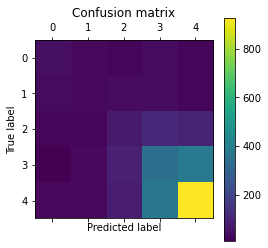

[[ 49  32  25  36  27]
 [ 38  30  37  40  24]
 [ 26  24  77 113 103]
 [ 10  33  96 348 383]
 [ 30  30  85 376 928]]


              precision    recall  f1-score   support

           1    0.32026   0.28994   0.30435       169
           2    0.20134   0.17751   0.18868       169
           3    0.24063   0.22449   0.23228       343
           4    0.38116   0.40000   0.39035       870
           5    0.63345   0.64044   0.63693      1449

    accuracy                        0.47733      3000
   macro avg    0.35537   0.34648   0.35052      3000
weighted avg    0.47339   0.47733   0.47517      3000



Count Vectorizer, Tweak 1 - Min/max df, ngrams


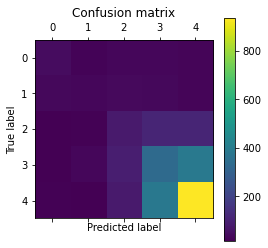

[[ 47  26  33  34  29]
 [ 35  33  38  36  27]
 [ 16  20  83 113 111]
 [ 18  33  93 336 390]
 [ 23  19  83 386 938]]


              precision    recall  f1-score   support

           1    0.33813   0.27811   0.30519       169
           2    0.25191   0.19527   0.22000       169
           3    0.25152   0.24198   0.24666       343
           4    0.37127   0.38621   0.37859       870
           5    0.62742   0.64734   0.63723      1449

    accuracy                        0.47900      3000
   macro avg    0.36805   0.34978   0.35753      3000
weighted avg    0.47271   0.47900   0.47536      3000



Tfidf Vectorizer, No Tweaks - Min/max df, ngrams


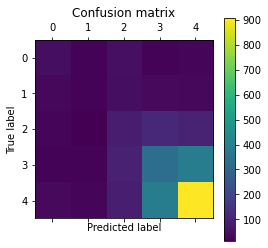

[[ 47  22  51  23  26]
 [ 33  22  46  35  33]
 [ 25  14  85 115 104]
 [ 21  23  96 338 392]
 [ 35  25  88 392 909]]


              precision    recall  f1-score   support

           1    0.29193   0.27811   0.28485       169
           2    0.20755   0.13018   0.16000       169
           3    0.23224   0.24781   0.23977       343
           4    0.37431   0.38851   0.38127       870
           5    0.62090   0.62733   0.62410      1449

    accuracy                        0.46700      3000
   macro avg    0.34538   0.33439   0.33800      3000
weighted avg    0.46313   0.46700   0.46448      3000



Tfidf Vectorizer, No Tweaks - Min/max df, no ngrams


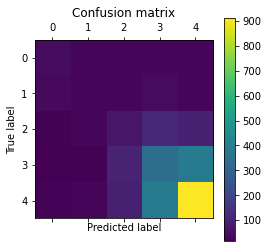

[[ 47  28  32  34  28]
 [ 39  30  29  43  28]
 [ 24  29  72 118 100]
 [ 17  23 106 340 384]
 [ 25  29  96 385 914]]


              precision    recall  f1-score   support

           1    0.30921   0.27811   0.29283       169
           2    0.21583   0.17751   0.19481       169
           3    0.21493   0.20991   0.21239       343
           4    0.36957   0.39080   0.37989       870
           5    0.62861   0.63078   0.62969      1449

    accuracy                        0.46767      3000
   macro avg    0.34763   0.33742   0.34192      3000
weighted avg    0.46494   0.46767   0.46606      3000



In [47]:
#print confusion matricies for decision tree predictions, continued
#code taken from week 5 examples and https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("Decision Tree Predictions:")
print("\n")
print("Count Vectorizer, No Tweaks - Min/max df, ngrams")
create_cm(dt0_expected2, dt0_predicted2)
print("\n")
print(metrics.classification_report(dt0_expected2, dt0_predicted2, digits=5))
print("\n")
print("Count Vectorizer, Tweak 1 - Min/max df, ngrams")
create_cm(dt1_expected2, dt1_predicted2)
print("\n")
print(metrics.classification_report(dt1_expected2, dt1_predicted2, digits=5))
print("\n")
print("Tfidf Vectorizer, No Tweaks - Min/max df, ngrams")
create_cm(dt0_expected3, dt0_predicted3)
print("\n")
print(metrics.classification_report(dt0_expected3, dt0_predicted3, digits=5))
print("\n")
print("Tfidf Vectorizer, No Tweaks - Min/max df, no ngrams")
create_cm(dt0_expected4, dt0_predicted4)
print("\n")
print(metrics.classification_report(dt0_expected4, dt0_predicted4, digits=5))

Naive Bayes Predictions:


Count Vectorizer, No Tweaks - No min/max df, no ngrams


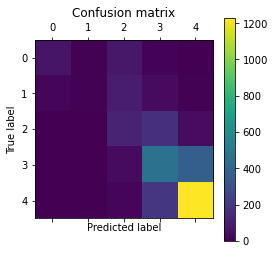

[[  68    7   80   11    3]
 [  23    8   92   38    8]
 [   3    3  121  173   43]
 [   0    2   36  458  374]
 [   3    2   17  196 1231]]


              precision    recall  f1-score   support

           1    0.70103   0.40237   0.51128       169
           2    0.36364   0.04734   0.08377       169
           3    0.34971   0.35277   0.35123       343
           4    0.52283   0.52644   0.52463       870
           5    0.74201   0.84955   0.79215      1449

    accuracy                        0.62867      3000
   macro avg    0.53584   0.43569   0.45261      3000
weighted avg    0.60997   0.62867   0.60843      3000



Count Vectorizer, No Tweaks - Min/max df, ngrams


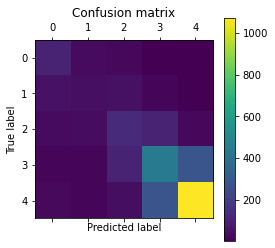

[[ 109   32   24    2    2]
 [  54   46   49   16    4]
 [  35   39  134  109   26]
 [  15   15  108  446  286]
 [  30   17   42  286 1074]]


              precision    recall  f1-score   support

           1    0.44856   0.64497   0.52913       169
           2    0.30872   0.27219   0.28931       169
           3    0.37535   0.39067   0.38286       343
           4    0.51921   0.51264   0.51591       870
           5    0.77155   0.74120   0.75607      1449

    accuracy                        0.60300      3000
   macro avg    0.48468   0.51233   0.49465      3000
weighted avg    0.60881   0.60300   0.60467      3000



Tfidf Vectorizer, No Tweaks - Min/max df, ngrams


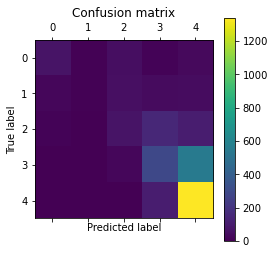

[[  69    6   48   13   33]
 [  24    9   54   39   43]
 [  12    4   70  148  109]
 [   4    0   22  292  552]
 [   2    0    1  105 1341]]


              precision    recall  f1-score   support

           1    0.62162   0.40828   0.49286       169
           2    0.47368   0.05325   0.09574       169
           3    0.35897   0.20408   0.26022       343
           4    0.48911   0.33563   0.39809       870
           5    0.64533   0.92547   0.76042      1449

    accuracy                        0.59367      3000
   macro avg    0.51774   0.38534   0.40147      3000
weighted avg    0.55628   0.59367   0.54564      3000



Tfidf Vectorizer, No Tweaks - Min/max df, no ngrams


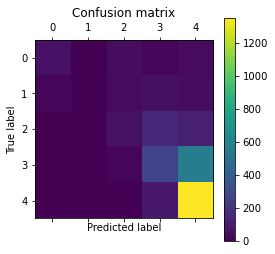

[[  66    5   44   16   38]
 [  20    8   42   54   45]
 [  10    3   62  151  117]
 [   2    0   21  273  574]
 [   2    0    2   93 1352]]


              precision    recall  f1-score   support

           1    0.66000   0.39053   0.49071       169
           2    0.50000   0.04734   0.08649       169
           3    0.36257   0.18076   0.24125       343
           4    0.46508   0.31379   0.37474       870
           5    0.63594   0.93306   0.75636      1449

    accuracy                        0.58700      3000
   macro avg    0.52472   0.37310   0.38991      3000
weighted avg    0.54883   0.58700   0.53410      3000



In [48]:
#print confusion matricies for decision tree predictions
#code taken from week 5 examples and https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("Naive Bayes Predictions:")
print("\n")
print("Count Vectorizer, No Tweaks - No min/max df, no ngrams")
create_cm(nb0_expected, nb0_predicted)
print("\n")
print(metrics.classification_report(nb0_expected, nb0_predicted, digits=5))
print("\n")
print("Count Vectorizer, No Tweaks - Min/max df, ngrams")
create_cm(nb0_expected2, nb0_predicted2)
print("\n")
print(metrics.classification_report(nb0_expected2, nb0_predicted2, digits=5))
print("\n")
print("Tfidf Vectorizer, No Tweaks - Min/max df, ngrams")
create_cm(nb0_expected3, nb0_predicted3)
print("\n")
print(metrics.classification_report(nb0_expected3, nb0_predicted3, digits=5))
print("\n")
print("Tfidf Vectorizer, No Tweaks - Min/max df, no ngrams")
create_cm(nb0_expected4, nb0_predicted4)
print("\n")
print(metrics.classification_report(nb0_expected4, nb0_predicted4, digits=5))

Logistic Regression Predictions:


Count Vectorizer, No Tweaks - No min/max df, no ngrams


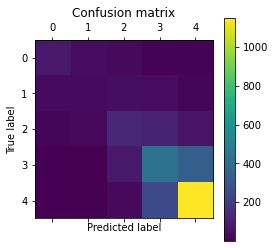

[[  79   37   28   14   11]
 [  36   34   42   37   20]
 [  16   24  125  117   61]
 [   4    3   80  432  351]
 [   1    5   30  261 1152]]


              precision    recall  f1-score   support

           1    0.58088   0.46746   0.51803       169
           2    0.33010   0.20118   0.25000       169
           3    0.40984   0.36443   0.38580       343
           4    0.50174   0.49655   0.49913       870
           5    0.72226   0.79503   0.75690      1449

    accuracy                        0.60733      3000
   macro avg    0.50896   0.46493   0.48197      3000
weighted avg    0.59253   0.60733   0.59771      3000



Count Vectorizer, Tweak 1 - No min/max df, no ngrams


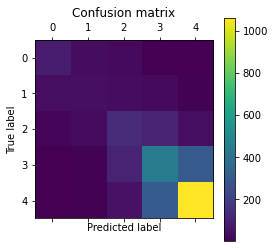

[[  90   38   29    8    4]
 [  44   46   39   30   10]
 [  23   34  136  105   45]
 [   8   11  111  437  303]
 [   8   11   56  311 1063]]


              precision    recall  f1-score   support

           1    0.44856   0.64497   0.52913       169
           2    0.30872   0.27219   0.28931       169
           3    0.37535   0.39067   0.38286       343
           4    0.51921   0.51264   0.51591       870
           5    0.77155   0.74120   0.75607      1449

    accuracy                        0.60300      3000
   macro avg    0.48468   0.51233   0.49465      3000
weighted avg    0.60881   0.60300   0.60467      3000



Count Vectorizer, Tweak 2 - No min/max df, no ngrams


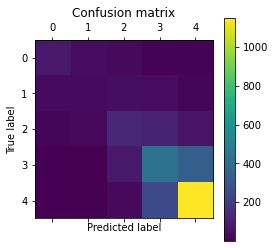

[[  79   37   28   14   11]
 [  36   34   42   37   20]
 [  16   24  125  117   61]
 [   4    3   80  432  351]
 [   1    5   30  261 1152]]


              precision    recall  f1-score   support

           1    0.58088   0.46746   0.51803       169
           2    0.33010   0.20118   0.25000       169
           3    0.40984   0.36443   0.38580       343
           4    0.50174   0.49655   0.49913       870
           5    0.72226   0.79503   0.75690      1449

    accuracy                        0.60733      3000
   macro avg    0.50896   0.46493   0.48197      3000
weighted avg    0.59253   0.60733   0.59771      3000



Count Vectorizer, No Tweaks - Min/max df, ngrams


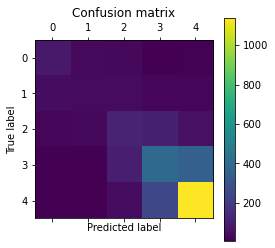

[[  84   35   30    8   12]
 [  43   38   38   27   23]
 [  25   30  122  108   58]
 [   8    9  103  396  354]
 [   7   11   45  246 1140]]


              precision    recall  f1-score   support

           1    0.50299   0.49704   0.50000       169
           2    0.30894   0.22485   0.26027       169
           3    0.36095   0.35569   0.35830       343
           4    0.50446   0.45517   0.47855       870
           5    0.71834   0.78675   0.75099      1449

    accuracy                        0.59333      3000
   macro avg    0.47914   0.46390   0.46962      3000
weighted avg    0.58026   0.59333   0.58530      3000



Tfidf Vectorizer, No Tweaks - Min/max df, ngrams


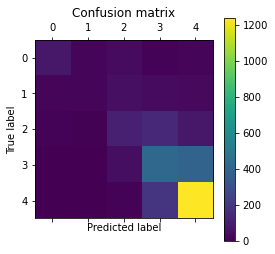

[[  82   17   37   11   22]
 [  23   24   53   38   31]
 [  12    8  109  136   78]
 [   4    2   48  419  397]
 [   2    0   13  192 1242]]


              precision    recall  f1-score   support

           1    0.66667   0.48521   0.56164       169
           2    0.47059   0.14201   0.21818       169
           3    0.41923   0.31778   0.36153       343
           4    0.52638   0.48161   0.50300       870
           5    0.70169   0.85714   0.77167      1449

    accuracy                        0.62533      3000
   macro avg    0.55691   0.45675   0.48320      3000
weighted avg    0.60357   0.62533   0.60385      3000



Tfidf Vectorizer, No Tweaks - Min/max df, no ngrams


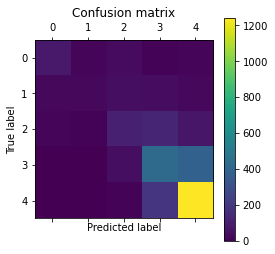

[[  86   18   35   11   19]
 [  25   27   48   42   27]
 [  15   13  109  130   76]
 [   4    2   48  428  388]
 [   3    0   13  190 1243]]


              precision    recall  f1-score   support

           1    0.64662   0.50888   0.56954       169
           2    0.45000   0.15976   0.23581       169
           3    0.43083   0.31778   0.36577       343
           4    0.53433   0.49195   0.51227       870
           5    0.70907   0.85783   0.77639      1449

    accuracy                        0.63100      3000
   macro avg    0.55417   0.46724   0.49195      3000
weighted avg    0.60847   0.63100   0.61074      3000



In [49]:
#print confusion matricies for decision tree predictions
#code taken from week 5 examples and https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("Logistic Regression Predictions:")
print("\n")
print("Count Vectorizer, No Tweaks - No min/max df, no ngrams")
create_cm(lr0_expected, lr0_predicted)
print("\n")
print(metrics.classification_report(lr0_expected, lr0_predicted, digits=5))
print("\n")
print("Count Vectorizer, Tweak 1 - No min/max df, no ngrams")
create_cm(lr1_expected, lr1_predicted)
print("\n")
print(metrics.classification_report(nb0_expected2, nb0_predicted2, digits=5))
print("\n")
print("Count Vectorizer, Tweak 2 - No min/max df, no ngrams")
create_cm(lr2_expected, lr2_predicted)
print("\n")
print(metrics.classification_report(lr2_expected, lr2_predicted, digits=5))
print("\n")
print("Count Vectorizer, No Tweaks - Min/max df, ngrams")
create_cm(lr0_expected2, lr0_predicted2)
print("\n")
print(metrics.classification_report(lr0_expected2, lr0_predicted2, digits=5))
print("\n")
print("Tfidf Vectorizer, No Tweaks - Min/max df, ngrams")
create_cm(lr0_expected3, lr0_predicted3)
print("\n")
print(metrics.classification_report(lr0_expected3, lr0_predicted3, digits=5))
print("\n")
print("Tfidf Vectorizer, No Tweaks - Min/max df, no ngrams")
create_cm(lr0_expected4, lr0_predicted4)
print("\n")
print(metrics.classification_report(lr0_expected4, lr0_predicted4, digits=5))

Best Model for Accuracy:


Tfidf Vectorizer, No Tweaks - Min/max df, no ngrams


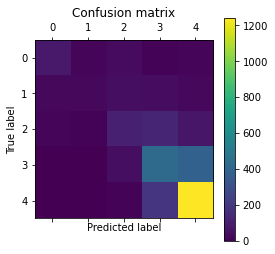

[[  86   18   35   11   19]
 [  25   27   48   42   27]
 [  15   13  109  130   76]
 [   4    2   48  428  388]
 [   3    0   13  190 1243]]


              precision    recall  f1-score   support

           1    0.64662   0.50888   0.56954       169
           2    0.45000   0.15976   0.23581       169
           3    0.43083   0.31778   0.36577       343
           4    0.53433   0.49195   0.51227       870
           5    0.70907   0.85783   0.77639      1449

    accuracy                        0.63100      3000
   macro avg    0.55417   0.46724   0.49195      3000
weighted avg    0.60847   0.63100   0.61074      3000



In [50]:
#overall, the most accurate model
#vectorizer: Tfidf, min/max df, no ngrams
#prediction: Logistic Regression

print("Best Model for Accuracy:")
print("\n")
print("Tfidf Vectorizer, No Tweaks - Min/max df, no ngrams")
create_cm(lr0_expected4, lr0_predicted4)
print("\n")
print(metrics.classification_report(lr0_expected4, lr0_predicted4, digits=5))

# Questions

## Q1.  Describe data selected and what you're hoping to predict.  Make sure your answer is no longer than two concise paragraphs and tailored towards a non-technical audience. At a minimum your response should answer these questions:

### What is your target variable (supervised) or intended class assignments (unsupervised)?
### Based on your business question, which performance/accuracy measures will be used to identify the 'best' model?
### Based on the business context, how accurate does the model need to be to be useful?

&emsp;For this assignment, our company is a hospitality and hotel ownership group, and we will be further analyzing reviews that are left by customers. The data that we are interested in is the written review as well as the star rating that the customer has left. In our predictions, we hope to be able to write a supervised model that can predict the target variable of a star rating 1-5, based on the text written by the customer. We know that not in every scenario we will be able to collect a stared rating, but we know that these numerical averages over time are important for leadership to gauge the performance of their hotels. Being able to assign a predicted star value to each review will give our management teams the data they need to make further business decisions that impact the overall performance of our hotels.

&emsp;To determine which model is performing the best, we will focus on the accuracy number as our primary indication with the help of some category precision ratings to determine the effectiveness of our model. This should be able to tell us how accurately we are predicting the overall dataset, as well as how well we predicted each class. For this model to be considered effective, we set a target goal of 80% accuracy. Due to the nature of what these ratings represent for the company, we want to really make sure we are appropriately accounting for the stars that would be given. We feel it is important to also make sure that we aren’t misrepresenting our customer’s original thoughts. It can be hard to judge how a customer really feels sometimes, so we want to be confident that our predictions will be leading us to the right data.


## Q2. Write a short description of the predictive analysis methods applied.  Make sure your answer is no longer than two paragraphs and tailored to a technical audience.  At a minimum answer these questions:

### What methods did you explore? Why?
### Which model performed best?
### What factors seemed to have the most influence on your results (e.g. algorithm selected, tuning of parameters/features, preprocessing decisions)

&emsp;In this process we decided to explore 3 different models of supervised learning. Since our data is already in categories, 1-5, using supervised learning made the most sense. We looked at Decision Trees, Naïve Bayes, and Logistic Regression. We went with a wide net of predictive models, because we just weren’t sure how well they would all predict. We felt it was important to experiment so as to be sure that we settled on the right model to present to our managerial board. Due to managements limited time, budget, and needing to make sure we prove the worth of this assignment, only the best model will do.

&emsp;Our overall best model was based on Logistic Regression. Unfortunately our level of accuracy did not hit 80%, but this model was the closest. We had an accuracy rating of 63%. Overall we seemed to do best predicting the 1 stars and 5 stars, but once we begin to predict the more nuanced middle ratings, this is where the model began to show is limits. We can see that in our model we had a 64% precision of 1 stars and a 71% precision of 5 stars. We began with a TFidf Vectorizer as well, as it proved to increase our models accuracy over the standard Count Vectorizer. We found that in our preparation, doing the least, gave us the most. In other words, leaving standard settings, not tweaking weights, not using ngrams gave us the best overall accuracy. We found that sometimes a tweak in bucket size or weights actually caused some categories to improve, but at the sacrifice of another, causing the overall accuracy to decline.